# Decision Trees for Classification

In [1]:
# basics
import numpy as np

# machine learning
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
# simulate train data
X_train, y_train = make_blobs(
    n_samples=201,
    n_features=2,
    cluster_std=3.75,
    centers=3,
    random_state=42,
)

In [3]:
# simulate test data
X_test, y_test = make_blobs(
    n_samples=201,
    n_features=2,
    cluster_std=3.75,
    centers=3,
    random_state=42,
)

In [4]:
# list the possible inputs (and their default values) to the DecisionTreeClassifier
# these are all tuneable
DecisionTreeClassifier().get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [5]:
# initialize a decision tree
tree = DecisionTreeClassifier(max_depth=2)

In [6]:
# fit the decision tree
_ = tree.fit(X_train, y_train)

In [7]:
# calculate test accuracy
np.mean(tree.predict(X_test) == y_test)

0.8656716417910447

In [8]:
# inspect (first 10) estimated conditional probabilities in test data
tree.predict_proba(X_test)[:10]

array([[0.        , 0.        , 1.        ],
       [0.8030303 , 0.04545455, 0.15151515],
       [0.18421053, 0.81578947, 0.        ],
       [0.18421053, 0.81578947, 0.        ],
       [0.18421053, 0.81578947, 0.        ],
       [0.18421053, 0.81578947, 0.        ],
       [0.18421053, 0.81578947, 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.18421053, 0.81578947, 0.        ]])

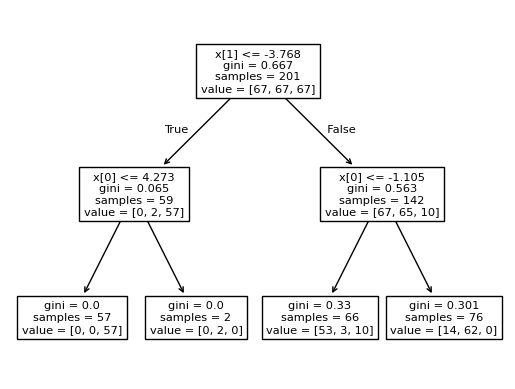

In [9]:
# plot the tree
_ = plot_tree(tree)

In [10]:
# view text representation of the tree
print(export_text(tree, show_weights=True))

|--- feature_1 <= -3.77
|   |--- feature_0 <= 4.27
|   |   |--- weights: [0.00, 0.00, 57.00] class: 2
|   |--- feature_0 >  4.27
|   |   |--- weights: [0.00, 2.00, 0.00] class: 1
|--- feature_1 >  -3.77
|   |--- feature_0 <= -1.11
|   |   |--- weights: [53.00, 3.00, 10.00] class: 0
|   |--- feature_0 >  -1.11
|   |   |--- weights: [14.00, 62.00, 0.00] class: 1



## Effects of Scaling

In [11]:
# simulate train data
X_train, y_train = make_blobs(
    n_samples=201,
    n_features=2,
    cluster_std=3.75,
    centers=3,
    random_state=42,
)
# modify a feature to but it on a very different scale
X_train[:, 1] = X_train[:, 1] * 20

In [12]:
# simulate test data
X_test, y_test = make_blobs(
    n_samples=201,
    n_features=2,
    cluster_std=3.75,
    centers=3,
    random_state=42,
)
# modify a feature to but it on a very different scale
X_test[:, 1] = X_test[:, 1] * 20

In [13]:
# inspect the train data
X_train[:10]

array([[-5.96100255e+00, -1.75622930e+02],
       [-2.13550500e+00,  1.42525049e+02],
       [ 1.72490722e-01,  8.87049143e+01],
       [ 1.31367044e-03, -5.95708523e+01],
       [ 6.24031968e-01,  7.56488248e+01],
       [ 1.07614212e+01, -6.77972097e+01],
       [ 4.81077324e+00, -9.40663239e+00],
       [-9.32064131e-01, -2.30438354e+02],
       [-3.83139425e+00, -9.03800287e+01],
       [ 1.16388957e+00,  3.49989920e+01]])

In [14]:
# learn scaler from train data and transform both train and test X data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)

In [15]:
# create tree and knn models
tree = DecisionTreeClassifier(max_depth=10)
knn = KNeighborsClassifier()

In [16]:
# scaling has an effect on knn!
_ = knn.fit(X_train, y_train)
print(knn.predict(X_test[:25, :]))
_ = knn.fit(X_train_transformed, y_train)
print(knn.predict(X_test_transformed[:25, :]))

[2 0 0 1 0 1 1 2 2 0 1 0 0 1 2 0 2 2 2 2 1 1 1 1 0]
[2 0 1 1 1 1 1 2 2 1 2 0 2 1 2 0 2 2 2 2 1 1 0 1 0]


In [17]:
# scaling has no effect on trees!
_ = tree.fit(X_train, y_train)
print(tree.predict(X_test[:25, :]))
_ = tree.fit(X_train_transformed, y_train)
print(tree.predict(X_test_transformed[:25, :]))

[2 0 1 1 1 1 1 2 2 1 2 0 2 1 2 0 2 2 2 2 1 1 0 1 0]
[2 0 1 1 1 1 1 2 2 1 2 0 2 1 2 0 2 2 2 2 1 1 0 1 0]
